## Cleaning `Bluebikes` Dataset

## Data preparation

### Read in data and perform basic transformations

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.environ['USE_PYGEOS']='0'
import geopandas as gpd

import pyrosm
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime

%matplotlib inline

In [2]:
bluebikes = pd.read_csv("bluebikes_2017_2018.csv", index_col="index")
bluebikes

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
index,,,,,,,,,
0,2018-08-28 07:01:05,2018-08-28 07:06:57,137,42.398365,-71.107818,220,42.396384,-71.120105,3296
1,2018-04-11 18:21:53,2018-04-11 18:35:06,122,42.345733,-71.100694,179,42.355601,-71.103945,1766
2,2018-11-28 17:08:21,2018-11-28 17:22:44,22,42.352175,-71.055547,98,42.371848,-71.060292,2585
3,2018-05-29 08:13:13,2018-05-29 08:23:12,88,42.374035,-71.101427,107,42.362500,-71.088220,2768
4,2018-07-13 06:26:24,2018-07-13 06:34:04,47,42.362811,-71.056067,64,42.351004,-71.049300,1002
...,...,...,...,...,...,...,...,...,...
3081595,2018-11-11 16:21:53,2018-11-11 17:01:29,160,42.337586,-71.096271,81,42.352409,-71.062679,3559
3081596,2017-08-02 08:28:53,2017-08-02 08:45:32,99,42.385582,-71.113341,80,42.361962,-71.092053,1113
3081597,2017-08-19 13:41:02,2017-08-19 13:48:03,47,42.362811,-71.056067,59,42.351356,-71.059367,700


In [14]:
# transform start and end time into datetime
bluebikes["start_time"] = pd.to_datetime(bluebikes["start_time"])
bluebikes["end_time"] = pd.to_datetime(bluebikes["end_time"])

# adding weekdays
bluebikes['weekday'] = bluebikes['start_time'].dt.weekday

# sort the values by start time
bluebikes.sort_values(["start_time"], inplace=True)

bluebikes.head()

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,weekday
index,,,,,,,,,,
2905041,2011-10-15 18:33:13,2018-05-22 19:40:53,37,42.356755,-71.071111,220,42.395172,-71.111337,1,5
2078389,2011-11-01 17:41:19,2018-04-04 19:19:48,52,42.287361,-71.076994,236,42.318697,-71.074019,4,1
715354,2011-12-02 07:59:12,2018-11-30 17:51:46,88,42.338254,-71.138020,85,42.359912,-71.049300,4,4
2791945,2012-05-02 16:32:57,2017-08-05 23:50:52,111,42.395172,-71.092053,372,42.396387,-71.139055,1,2
214988,2012-07-24 10:56:56,2017-08-07 18:55:42,211,42.306348,-71.073089,233,42.361199,-71.122881,4,1


In [15]:
# new subset without coordinates
bluebikes_subset= bluebikes[['start_time', 'end_time', 'start_station_id', 'end_station_id', 'bike_id', 'weekday']]
bluebikes_subset

,start_time,end_time,start_station_id,end_station_id,bike_id,weekday
index,,,,,,
2905041,2011-10-15 18:33:13,2018-05-22 19:40:53,37,220,1,5
2078389,2011-11-01 17:41:19,2018-04-04 19:19:48,52,236,4,1
715354,2011-12-02 07:59:12,2018-11-30 17:51:46,88,85,4,4
2791945,2012-05-02 16:32:57,2017-08-05 23:50:52,111,372,1,2
214988,2012-07-24 10:56:56,2017-08-07 18:55:42,211,233,4,1
...,...,...,...,...,...,...
1086641,2018-12-31 23:48:46,2018-12-31 23:56:55,19,179,4440,0
1134572,2018-12-31 23:48:58,2019-01-01 03:13:49,40,40,2117,0
1556416,2018-12-31 23:51:19,2019-01-01 00:17:15,68,68,3725,0


In [32]:
print(bluebikes.info())
print(bluebikes.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081600 entries, 2905041 to 211532
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   start_time         datetime64[ns]
 1   end_time           datetime64[ns]
 2   start_station_id   int64         
 3   start_station_lat  float64       
 4   start_station_lon  float64       
 5   end_station_id     int64         
 6   end_station_lat    float64       
 7   end_station_lon    float64       
 8   bike_id            int64         
 9   weekday            int64         
dtypes: datetime64[ns](2), float64(4), int64(4)
memory usage: 323.1 MB
None
       start_station_id  start_station_lat  start_station_lon  end_station_id  \
count      3.081600e+06       3.081600e+06       3.081600e+06    3.081600e+06   
mean       9.142570e+01       4.235739e+01      -7.108600e+01    9.128123e+01   
std        6.351354e+01       1.372931e-01       2.304351e-01    6.373496e+01   
min        1.0

### Handling missing numerical data

In [17]:
# checking for missing numerical data

bluebikes.isna().sum()

start_time           0
end_time             0
start_station_id     0
start_station_lat    0
start_station_lon    0
end_station_id       0
end_station_lat      0
end_station_lon      0
bike_id              0
weekday              0
dtype: int64

There are no numerical data missing

### Cleaning not Null values

In [34]:
bluebikes['bike_id'].unique()

array([   1,    4,    6, ..., 4401, 4503, 4539], dtype=int64)

In [35]:
bluebikes['start_station_id'].unique()

array([ 37,  52,  88, 111, 211, 347, 338, 237,  23,  43,  67,  36,  46,
        10,  47, 107,  58,   9,  89, 133,  27,  80,  22,  39, 178,  42,
         4, 115, 161, 102,  33,  84,  25, 131, 152,  51,  21,  32,  94,
        49,  54, 146, 179,  30,  96, 190,   8,  41, 110, 197,  93,  68,
       145,  19, 105, 180,  87, 185, 119,  59,  73, 118,  77, 215,  16,
        81,  11, 213,  14,  98, 195, 163, 169, 104,  78, 176, 184,  76,
        95,  74,   6,  91, 183, 100, 116, 124,  70,   7,  75, 173, 151,
        15,   5, 139, 218, 150,  31,  24,  20,   3,  44, 130,  17,  56,
       174, 142, 159,  71,  40, 177, 175, 160, 189,  63, 108, 141, 149,
       137, 109, 117,  90,  57, 121, 140, 208,  72, 143, 186,  85,  12,
       217, 200, 126, 138, 170,  65,  97, 210, 135, 201, 171,  92, 219,
        29, 136, 205, 196, 153,   1, 192, 202, 162, 214, 209, 216,  64,
        48, 203, 129,  60,  13,  35,  26, 120, 128, 113, 125, 122, 167,
        99,  79, 112, 212, 194,  66,  53, 199, 204,  45,  55,  6

In [36]:
bluebikes['end_station_id'].unique()

array([220, 236,  85, 372, 233, 182,  27, 111, 262, 311, 139,  10,   9,
        19,   8, 195, 179,  33,  15,  76, 102, 124,  56, 178,  43,  41,
        67,  16, 169,  46, 145, 146,   6, 190,  58,  84,   4,  22,  23,
       131,  14,  11,  95,  36,  57,  30, 118,  68,  97, 104,  39, 159,
        93,  77,  73,  80,  89,  74, 177, 100, 108,  25,  70,  32,  54,
       213, 105, 163, 215,  75, 115,  47, 152,  78, 133, 119,  96,  94,
       184,  90, 110, 189,  81,  37, 141, 183,   3,   7, 150,   5,  42,
        21,  91,  88,  44,  31,  17,  24,  71, 130, 161,  12, 200,  98,
        87, 109, 142,  49, 218, 107, 116, 143,  59, 197,  72, 160, 137,
       117, 173, 149,  20, 136,  29, 185,  63,  65, 176, 121,  92, 212,
        51, 140, 174,  40, 210, 138, 175, 186, 151, 171, 208, 135, 207,
       180,   1, 196, 153, 170, 192, 202, 162, 201, 126, 205, 209, 214,
       219,  35, 216,  48,  64, 129, 379, 120,  60,  26,  13, 122, 211,
       128, 113, 167, 125,  99,  79, 194, 204, 112, 217,  53,  6

In [31]:
bluebikes['start_time'].value_counts()

2017-08-04 08:54:42    6
2017-11-13 08:16:44    6
2017-07-05 17:31:53    5
2018-07-21 14:44:17    5
2018-11-07 17:07:12    5
                      ..
2017-10-12 16:30:36    1
2017-10-12 16:30:49    1
2017-10-12 16:30:58    1
2017-10-12 16:31:06    1
2018-12-31 23:54:38    1
Name: start_time, Length: 2901096, dtype: int64

In [40]:
bluebikes[bluebikes['start_time'].dt.year < 2017]

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,weekday
index,,,,,,,,,,
2905041,2011-10-15 18:33:13,2018-05-22 19:40:53,37,42.356755,-71.071111,220,42.395172,-71.111337,1,5
2078389,2011-11-01 17:41:19,2018-04-04 19:19:48,52,42.287361,-71.076994,236,42.318697,-71.074019,4,1
715354,2011-12-02 07:59:12,2018-11-30 17:51:46,88,42.338254,-71.138020,85,42.359912,-71.049300,4,4
2791945,2012-05-02 16:32:57,2017-08-05 23:50:52,111,42.395172,-71.092053,372,42.396387,-71.139055,1,2
214988,2012-07-24 10:56:56,2017-08-07 18:55:42,211,42.306348,-71.073089,233,42.361199,-71.122881,4,1
476020,2012-08-23 22:53:40,2018-04-08 12:21:50,347,42.348074,-71.077466,182,42.317283,-71.098634,1,3
2778382,2012-09-03 16:28:27,2018-10-31 19:10:42,338,42.344041,-71.058229,27,42.373268,-71.068808,6,0
1081360,2012-09-04 08:05:03,2018-05-28 14:35:43,237,42.348520,-71.096391,111,42.375304,-71.139613,6,1
713068,2012-09-28 08:36:56,2018-06-29 08:32:41,23,42.365673,-71.097271,262,42.349244,-71.083187,4,4


In [41]:
bluebikes[bluebikes['start_time'].dt.year > 2018]

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,weekday
index,,,,,,,,,,


In [42]:
bluebikes[bluebikes['end_time'].dt.year < 2017]

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,weekday
index,,,,,,,,,,


In [43]:
bluebikes[bluebikes['end_time'].dt.year > 2018]

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,weekday
index,,,,,,,,,,
776111,2018-12-02 18:15:31,2019-01-04 13:31:26,350,42.287361,-71.071111,1,42.387151,-71.075978,3064,6
2509552,2018-12-16 02:57:01,2019-01-04 05:53:32,340,42.274621,-71.093726,1,42.387151,-71.075978,3822,6
1204284,2018-12-17 09:20:01,2019-01-01 15:59:46,95,42.372969,-71.094445,95,42.372969,-71.094445,3044,0
846396,2018-12-23 00:14:31,2019-01-07 20:05:15,68,42.365070,-71.103100,137,42.398365,-71.107818,2074,6
2578077,2018-12-23 15:03:17,2019-01-02 13:26:34,352,42.348278,-71.080449,1,42.387151,-71.075978,3488,6
1324892,2018-12-29 01:21:05,2019-01-01 13:50:53,23,42.358920,-71.057629,12,42.336244,-71.087986,3405,5
2754180,2018-12-29 03:21:18,2019-01-04 05:57:28,76,42.366426,-71.105495,177,42.362648,-71.100061,3690,5
2016736,2018-12-29 03:21:37,2019-01-01 18:53:42,76,42.366426,-71.105495,139,42.361780,-71.108100,4122,5
914023,2018-12-30 05:12:01,2019-01-02 06:42:17,200,42.332817,-71.081198,190,42.365673,-71.064263,2834,6


In [48]:
bluebikes[bluebikes['end_time'] < bluebikes['start_time']]

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,weekday
index,,,,,,,,,,


In [51]:
# drop invalid tuples
bluebikes.drop(bluebikes[bluebikes['end_time'] < bluebikes['start_time']].index, inplace=True)
bluebikes.drop(bluebikes[bluebikes['end_time'].dt.year > 2018].index, inplace=True)
bluebikes.drop(bluebikes[bluebikes['start_time'].dt.year < 2017].index, inplace=True)

## Compute variable idle_time

Calculating the idle_time = end_time - start_time and inserting it into the dataset

## Visualization of the data

### Numerical analysis

array([[<Axes: title={'center': 'start_time'}>,
        <Axes: title={'center': 'end_time'}>],
       [<Axes: title={'center': 'start_station_id'}>,
        <Axes: title={'center': 'end_station_id'}>],
       [<Axes: title={'center': 'bike_id'}>,
        <Axes: title={'center': 'weekday'}>]], dtype=object)

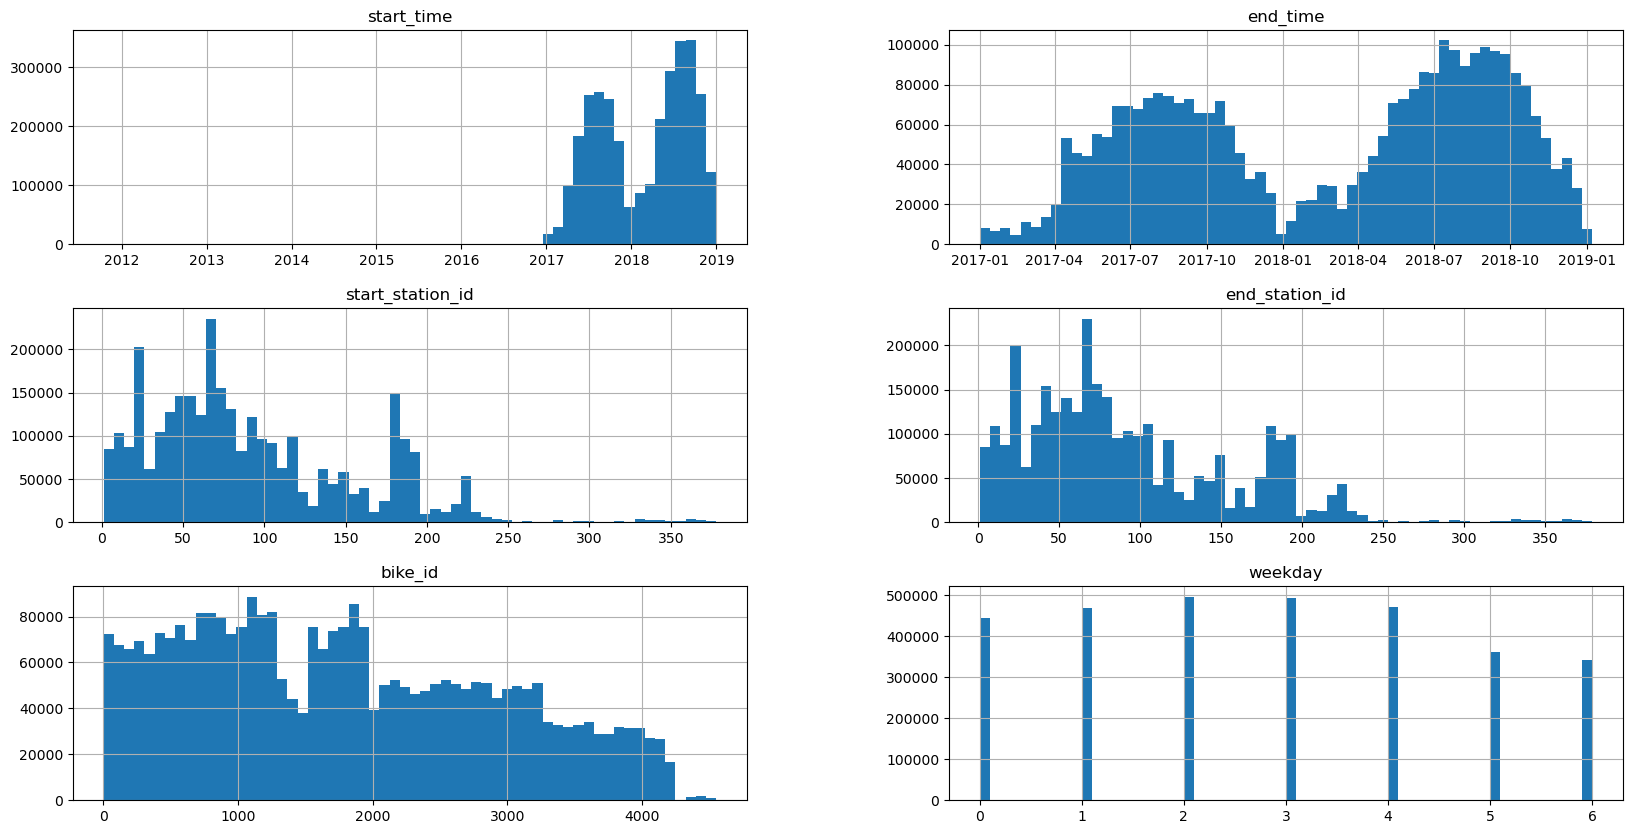

In [18]:
# Overview of the data
bluebikes_subset.hist(bins=60, figsize=(20,10))

The frequency of the usage of stations and bikes can be clearly seen.
<br>There are some bikes missing and the stations with an id > 250 are used rarely.
<br>The seasonality of the usage can also be observed. People use the bikes more often in summer than in winter.

In [8]:
# taking a closer look at the start and end time

bluebikes_end_hour = bluebikes["end_time"].dt.hour
bluebikes_start_hour = bluebikes["start_time"].dt.hour

In [24]:
# taking a closer look at idle_time


In [ ]:
# taking a closer look at the less used bikes
less_used_bikes = bluebikes_subset[bluebikes_subset['bike_id']>4200]
less_used_bikes

,start_time,end_time,start_station_id,end_station_id,bike_id
index,,,,,
223,2018-12-30 12:44:28,2018-12-30 12:49:24,369,192,4205
870,2018-12-13 17:12:10,2018-12-13 17:14:18,80,189,4408
900,2018-12-18 09:07:57,2018-12-18 09:13:46,239,100,4383
1068,2018-12-22 11:53:24,2018-12-22 12:02:20,88,177,4457
1084,2018-12-13 19:22:59,2018-12-13 19:41:15,97,69,4429
...,...,...,...,...,...
3079963,2018-12-22 12:13:22,2018-12-22 12:38:52,93,93,4352
3080144,2018-08-28 06:32:24,2018-08-28 06:48:57,60,116,4211
3080578,2018-10-28 11:10:41,2018-10-28 11:15:37,80,178,4205


<Axes: xlabel='start_station_id', ylabel='bike_id'>

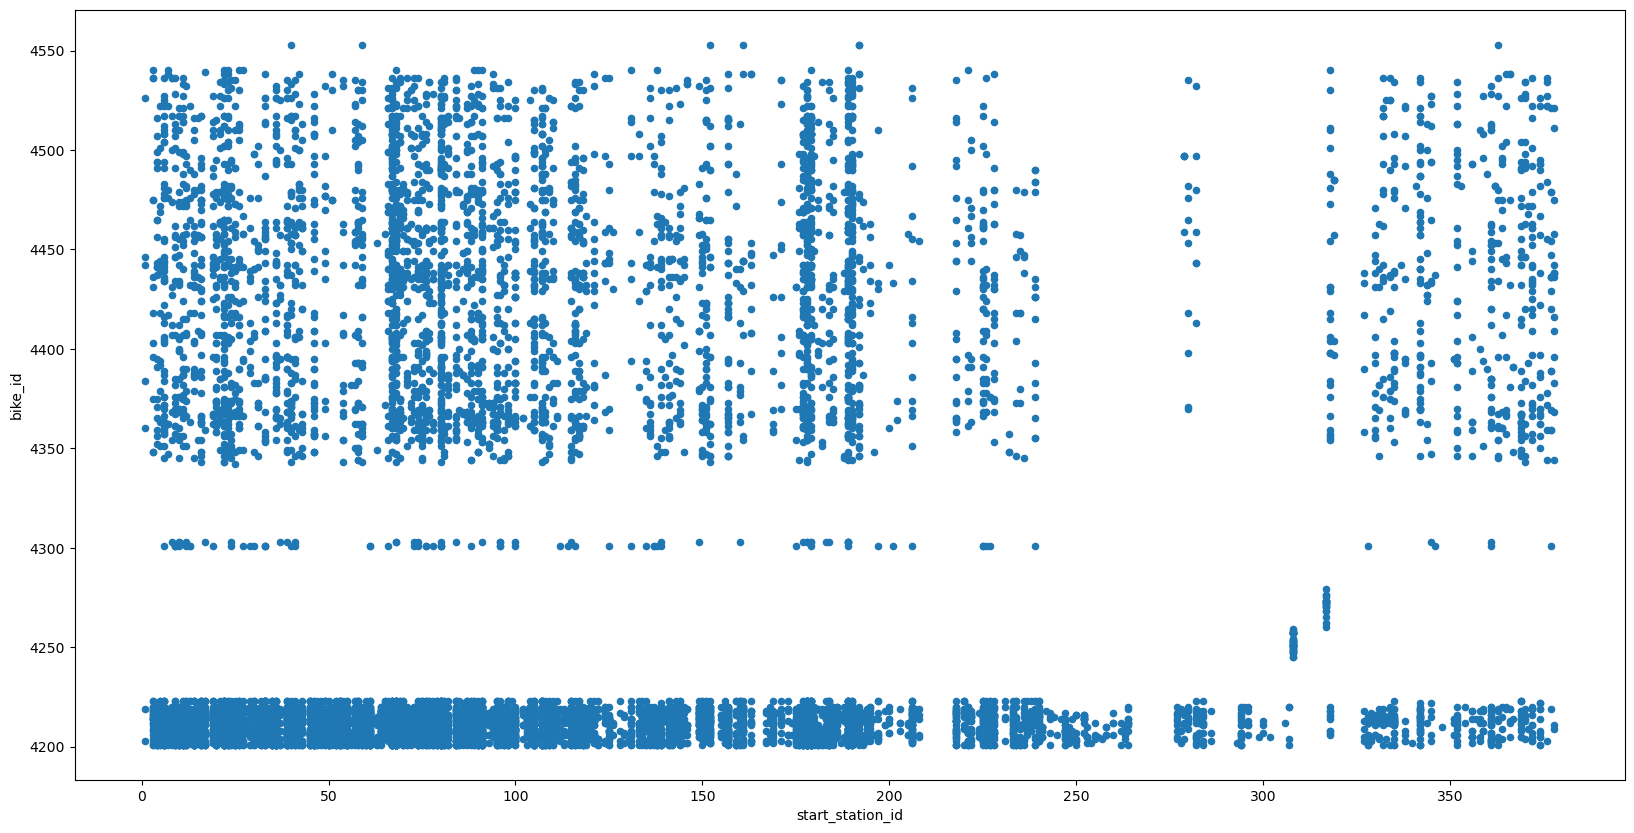

In [ ]:
less_used_bikes[["start_station_id", "bike_id"]].plot(kind="scatter", x="start_station_id", y="bike_id", figsize=(20,10))

### Categorical analysis

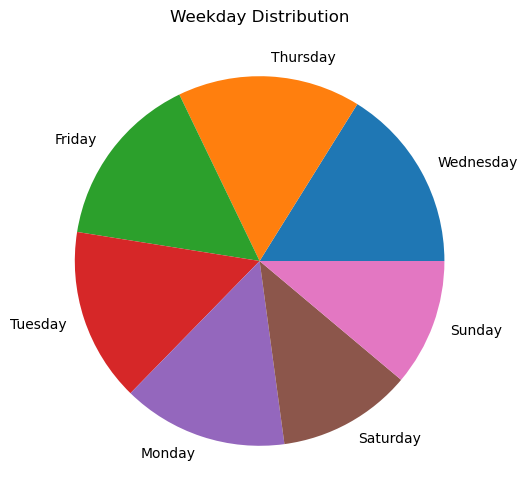

In [9]:
weekday_counts= bluebikes["weekday"].value_counts()
weekday_counts.plot(kind='pie',figsize=(6,6))


plt.title("Weekday Distribution")
plt.ylabel("")
plt.show()

### Searching for relationships with correlation coefficient

In [27]:
selected_columns = bluebikes[['weekday']] #idle_time

bluebikes_end_hour_series = pd.Series(bluebikes_end_hour)
bluebikes_start_hour_series = pd.Series(bluebikes_start_hour)
combined_columns = pd.concat([selected_columns, bluebikes_end_hour_series, bluebikes_start_hour_series], axis=1)

corr = combined_columns.corr()
corr

,weekday,end_time,start_time
weekday,1.000000,0.032576,0.028935
end_time,0.032576,1.000000,0.958986
start_time,0.028935,0.958986,1.000000


([<matplotlib.axis.YTick at 0x16a8ff3fca0>,
 [Text(0, 0, 'weekday'), Text(0, 1, 'end_time'), Text(0, 2, 'start_time')])

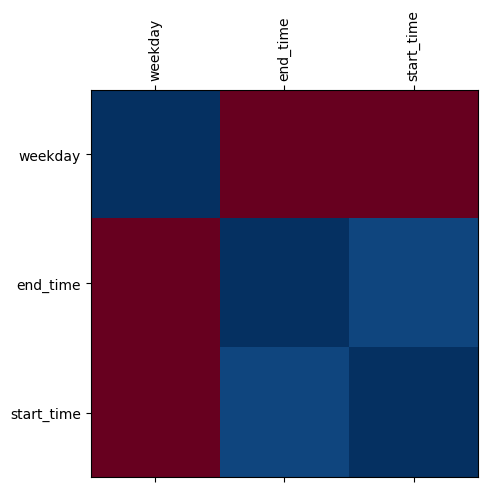

In [28]:
fig = plt.figure(figsize=(5,5))
plt.matshow(corr,cmap='RdBu',fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation="vertical")
plt.yticks(range(len(corr.columns)), corr.columns)

### Station locations

In [ ]:
# zip latitude and longitude of the start and end station data
bluebikes["start_station_coordinates"] = list(zip(bluebikes["start_station_lat"].round(4), bluebikes["start_station_lon"].round(4)))
bluebikes["end_station_coordinates"] = list(zip(bluebikes["end_station_lat"].round(4), bluebikes["end_station_lon"].round(4)))

bluebikes.head()

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,start_station_coordinates,end_station_coordinates
index,,,,,,,,,,,
2905041,2011-10-15 18:33:13,2018-05-22 19:40:53,37,42.356755,-71.071111,220,42.395172,-71.111337,1,"(42.3568, -71.0711)","(42.3952, -71.1113)"
2078389,2011-11-01 17:41:19,2018-04-04 19:19:48,52,42.287361,-71.076994,236,42.318697,-71.074019,4,"(42.2874, -71.077)","(42.3187, -71.074)"
715354,2011-12-02 07:59:12,2018-11-30 17:51:46,88,42.338254,-71.138020,85,42.359912,-71.049300,4,"(42.3383, -71.138)","(42.3599, -71.0493)"
2791945,2012-05-02 16:32:57,2017-08-05 23:50:52,111,42.395172,-71.092053,372,42.396387,-71.139055,1,"(42.3952, -71.0921)","(42.3964, -71.1391)"
214988,2012-07-24 10:56:56,2017-08-07 18:55:42,211,42.306348,-71.073089,233,42.361199,-71.122881,4,"(42.3063, -71.0731)","(42.3612, -71.1229)"


In [ ]:
# plotting the stations

# define empty map
bluebikes_start_stations_map_points = folium.Map(location=(42.361145, -71.057083), tiles="OpenStreetMap", zoom_start=12)

# draw positions for the stations
# whether we choose the coordinates from start or end station does not matter since they are the same
positions = list(bluebikes["start_station_coordinates"].unique())
for position in positions:
    folium.Marker(radius=10, location=position).add_to(bluebikes_start_stations_map_points)

bluebikes_start_stations_map_points

<Axes: >

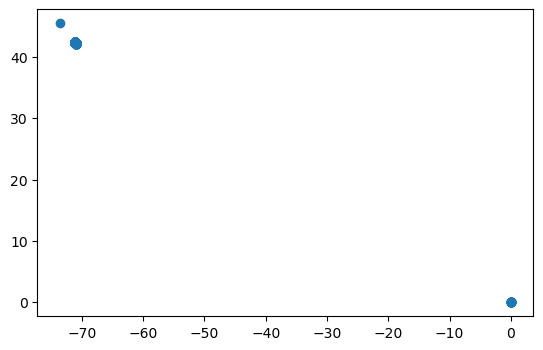

In [ ]:
bluebikes_pois = gpd.GeoDataFrame(bluebikes, geometry=gpd.points_from_xy(bluebikes['start_station_lon'], bluebikes['start_station_lat']))
bluebikes_pois.plot()

### Bike usage and time

In [ ]:
bluebikes["start_date"] = bluebikes["start_time"].dt.date
bluebikes["start_time"] = bluebikes["start_time"].dt.time
bluebikes["end_date"] = bluebikes["end_time"].dt.date
bluebikes["end_time"] = bluebikes["end_time"].dt.time

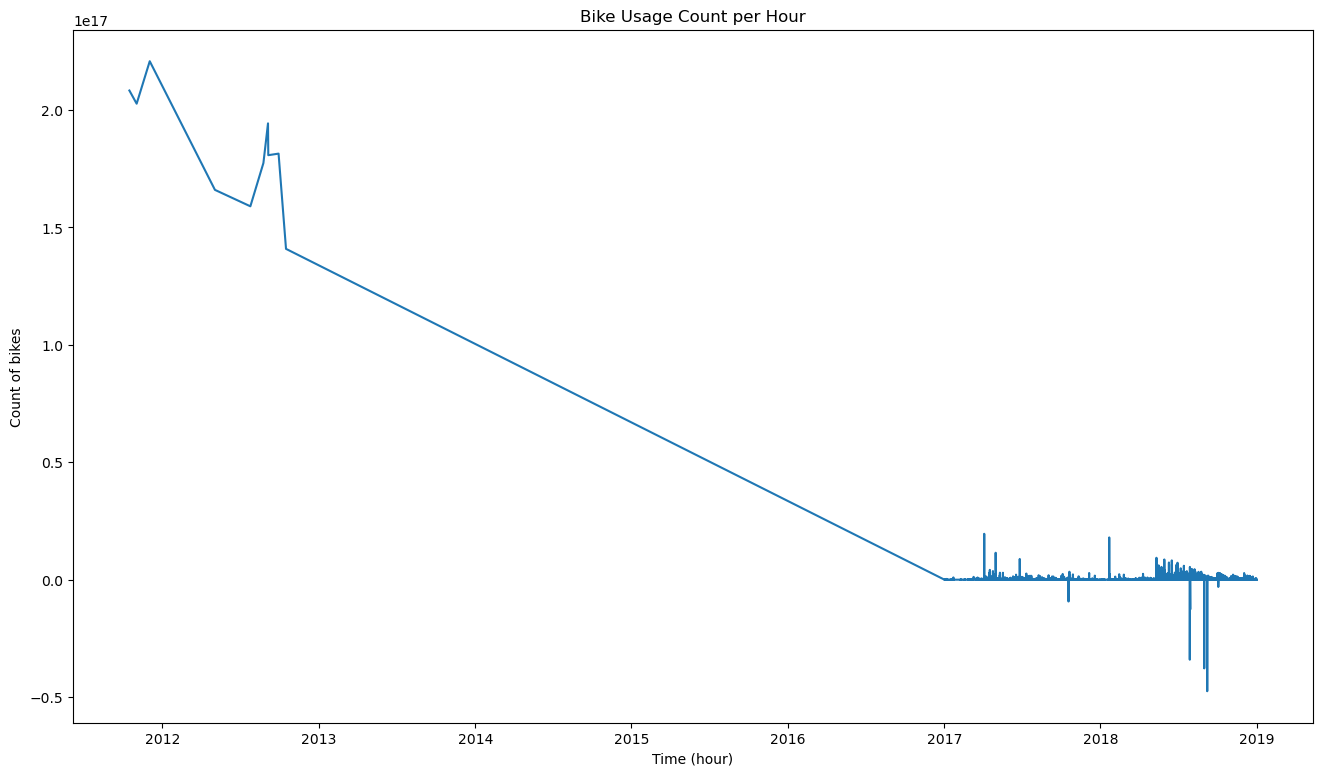

In [ ]:
# try to figure out at which hours the bikes have been used the most

# calculate the duration of bike usage
bike_usage_time = bike_end_time - bike_start_time

# create figure
fig,ax = plt.subplots(figsize=(16,9))

# plot
ax.plot(bluebikes["start_time"], bike_usage_time)
ax.set_xlabel("Time (hour)")
ax.set_ylabel("Count of bikes")
ax.set_title("Bike Usage Count per Hour")

plt.show()

In [ ]:
# plotting frequency of a bike in heat map
bluebikes_list = bluebikes["bike_id"].unique()
selected_bike_ID = bluebikes_list[0]

# define new map
bluebikes_heat_map = folium.Map(location=(42.361145, -71.057083), tiles="OpenStreetMap", zoom_start=12, max_zoom=20)

# map
bluebikes_heat_map.add_child(plugins.HeatMap(bluebikes[bluebikes["bike_id"]==selected_bike_ID]["start_station_coordinates"], radius=20))

bluebikes_heat_map

## Normalize data (rescaling)

Should be used before applying the gradient descent algorithm

In [7]:
# x = (x-min(xp))/(max(xp)-min(xp))

## Rebalance dataset

## Normalize database

Extracting data from the dataset and save them in a different set

## Reduce dimensionality of data

Reduction can be achieved through feature selection or feature extraction